# Mesh Revolve (평면 객체를 회전 시켜 입체로 만들기)
 - extrude_rotate() 함수 사용

    resolution : int, optional
        Number of pieces to divide line into.
    
    inplace : bool, default: False
        Overwrites the original mesh inplace.
    
    translation : float, optional
        Total amount of translation along the axis.
    
    dradius : float, optional
        Change in radius during sweep process.
    
    angle : float, optional
        The angle of rotation in degrees.
    
    capping : bool, optional
        Control if the sweep of a 2D object is capped. The default is
        ``False``, which differs from VTK's default.
    
        .. warning::
           The ``capping`` keyword was added in version 0.32.0 with a
           default value of ``False``. In a future version this default
           will be changed to ``True`` to match the behavior of the
           underlying VTK filter. It is recommended to explicitly pass
           a value for this keyword argument to prevent future changes
           in behavior and warnings.
    
    rotation_axis : numpy.ndarray or sequence, optional
        The direction vector of the axis around which the rotation is done.
        It requires vtk>=9.1.0.
    
    progress_bar : bool, default: False
        Display a progress bar to indicate progress.
    

In [1]:
import pyvista as pv
import numpy as np

# pv.global_theme.jupyter_backend = 'client'
# pv.start_xvfb()
pv.global_theme.jupyter_backend = 'static'

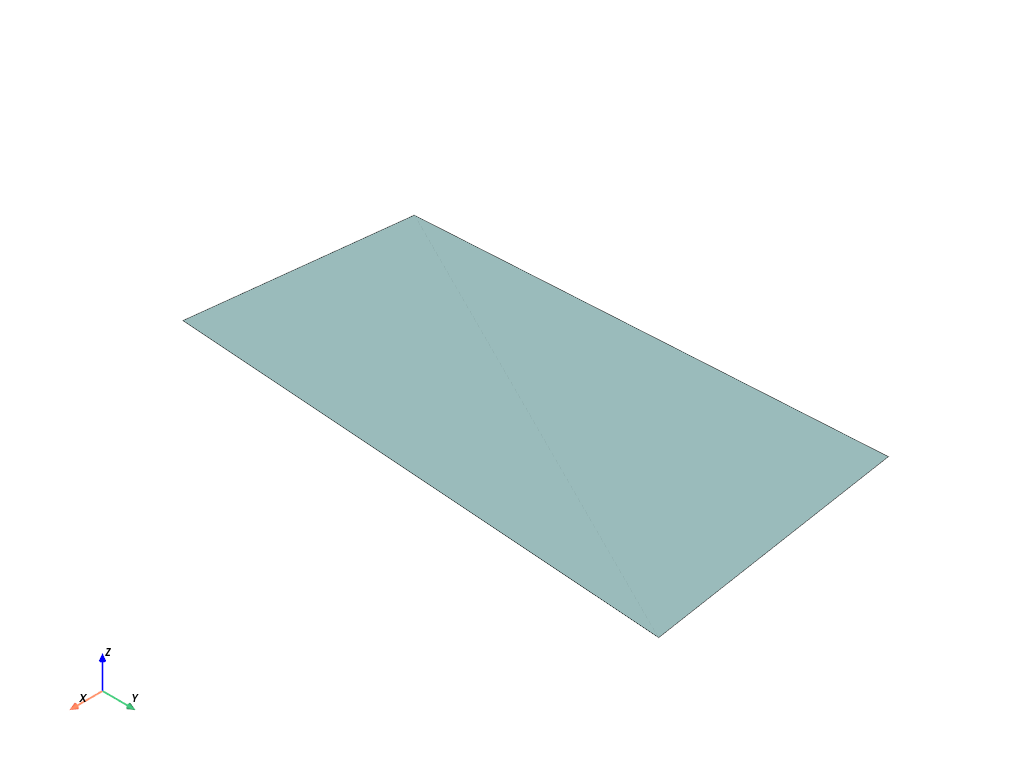

In [2]:
# 1) 사각형 꼭짓점 정의 (XY 평면 상, Z=0)
#    - x 좌표는 [0.5, 1.0], y 좌표는 [0.0, 1.0]
#    - 결과적으로 중심축(Z축)에서의 반경이 0.5~1.0 사이인 사각형
points = np.array([
    [0.5, 0.0, 0.0],
    [1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0],
    [0.5, 1.0, 0.0],
])

# 2) faces 배열 정의
#    첫 원소 '4'는 꼭짓점 개수, 그 뒤로 점 인덱스
faces = np.hstack([[4, 0, 1, 2, 3]])

# 3) PolyData 생성
square = pv.PolyData(points, faces)
square.plot(show_edges=True)

In [3]:
help(square.extrude_rotate)

Help on method extrude_rotate in module pyvista.core.filters.poly_data:

extrude_rotate(resolution=30, inplace=False, translation=0.0, dradius=0.0, angle=360.0, capping=None, rotation_axis=(0, 0, 1), progress_bar=False) method of pyvista.core.pointset.PolyData instance
    Sweep polygonal data creating "skirt" from free edges and lines, and lines from vertices.
    
    This takes polygonal data as input and generates polygonal
    data on output. The input dataset is swept around the axis
    to create new polygonal primitives. These primitives form a
    "skirt" or swept surface. For example, sweeping a line results
    in a cylindrical shell, and sweeping a circle creates a torus.
    
    There are a number of control parameters for this filter.  You
    can control whether the sweep of a 2D object (i.e., polygon or
    triangle strip) is capped with the generating geometry via the
    ``capping`` parameter. Also, you can control the angle of
    rotation, and whether translation a

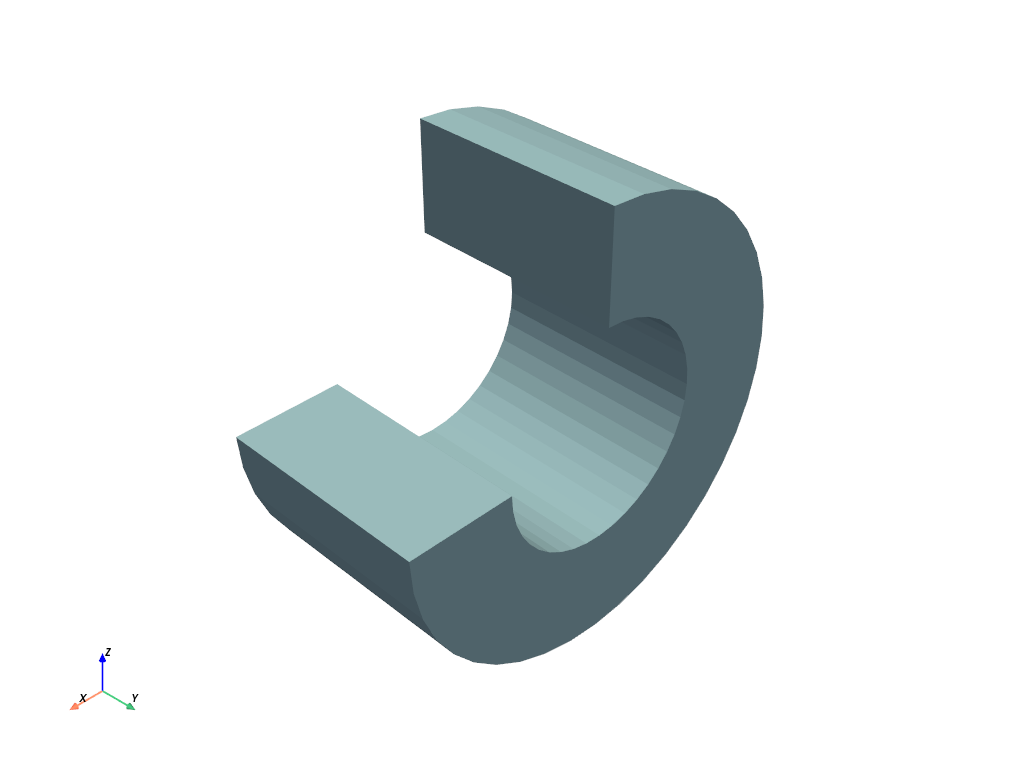

In [4]:
# 2) extrude_rotate 사용
#    - angle=360 : 360도 회전
#    - resolution=30 : 회전 각도를 얼마나 세분화할지
#    - capping=False : 윗면, 아랫면을 막지 않음
revolved = square.extrude_rotate(
    angle=270,
    capping=True,
    resolution=30,
    rotation_axis=(0,1,0)
)

# 3) 시각화
revolved.plot()

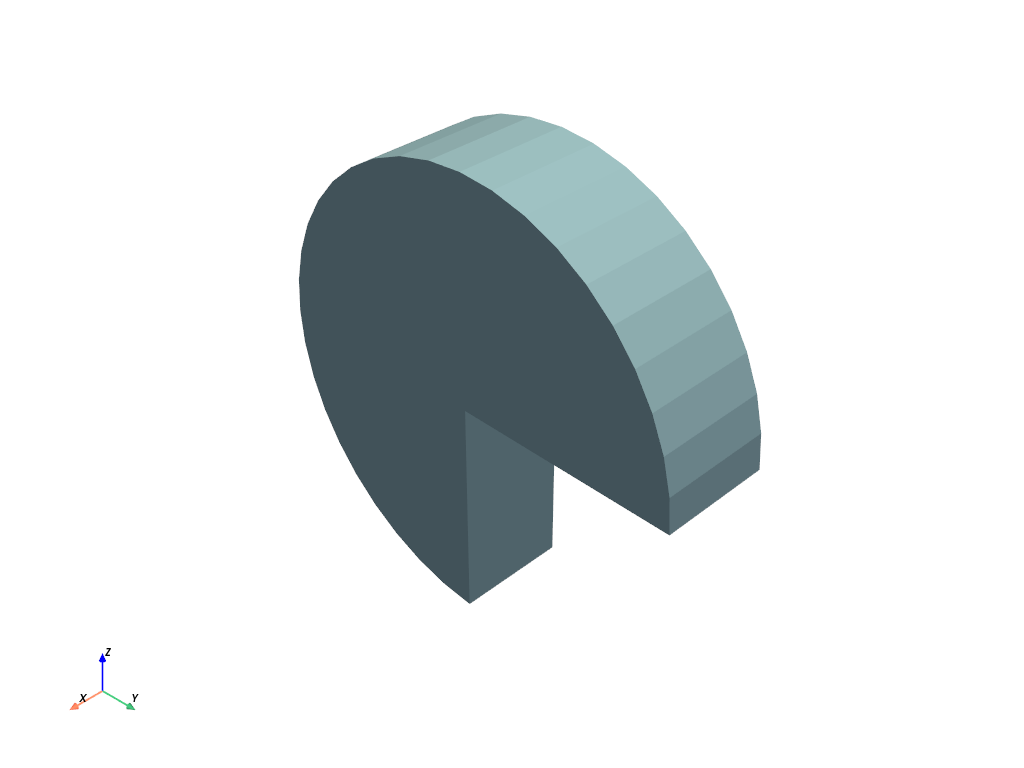

In [5]:
revolved = square.extrude_rotate(
    angle=270,
    capping=True,
    resolution=30,
    rotation_axis=(1,0,0)
)

# 3) 시각화
revolved.plot()